In [1]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
# import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout
# import splitfolders
import keras
import pickle

2025-04-17 23:53:26.656849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# splitfolders.ratio("Alzheimer_Dataset", output="output",seed=1345,ratio=(0.8,0.1,0.1))

In [3]:



train_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


test_set = keras.utils.image_dataset_from_directory(
    "./output/test",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)

val_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 5119 files belonging to 4 classes.


2025-04-17 23:53:27.794373: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# class_names = train_set.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_set.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")



In [8]:
cnn = tf.keras.models.Sequential()

cnn.add(keras.layers.Rescaling(scale=1./255, offset=-1, input_shape=(128,128, 3)))

cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(keras.layers.Dropout(0.20))

cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))



In [9]:
# cnn.summary()

In [10]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = cnn.fit(train_set, validation_data = val_set, epochs = 5,batch_size=32,verbose=1 )

Epoch 1/5
160/160 [==============================] - ETA: 0s - loss: 1.1568 - accuracy: 0.5105  

2025-04-17 23:54:49.323594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5119]
	 [[{{node Placeholder/_0}}]]
2025-04-17 23:54:49.324756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5119]
	 [[{{node Placeholder/_0}}]]


160/160 [==============================] - 59s 367ms/step - loss: 1.1568 - accuracy: 0.5105 - val_loss: 0.9687 - val_accuracy: 0.5532
Epoch 2/5
160/160 [==============================] - 53s 331ms/step - loss: 0.8882 - accuracy: 0.5782 - val_loss: 0.8231 - val_accuracy: 0.6361
Epoch 3/5
160/160 [==============================] - 54s 338ms/step - loss: 0.8128 - accuracy: 0.6267 - val_loss: 0.6843 - val_accuracy: 0.7371
Epoch 4/5
160/160 [==============================] - 50s 314ms/step - loss: 0.6758 - accuracy: 0.6954 - val_loss: 0.5500 - val_accuracy: 0.8011
Epoch 5/5
160/160 [==============================] - 55s 341ms/step - loss: 0.5475 - accuracy: 0.7675 - val_loss: 0.3368 - val_accuracy: 0.8810


In [11]:
cnn.save("model.keras")

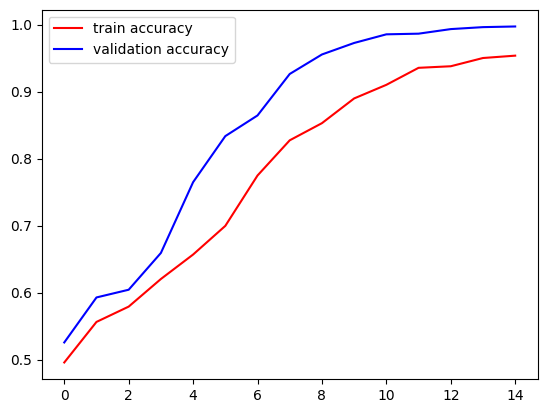

In [24]:
# plt.plot(history.history['accuracy'],color='red',label='train accuracy')
# plt.plot(history.history['val_accuracy'], color = 'blue', label='validation accuracy')
# plt.legend()
# plt.show()

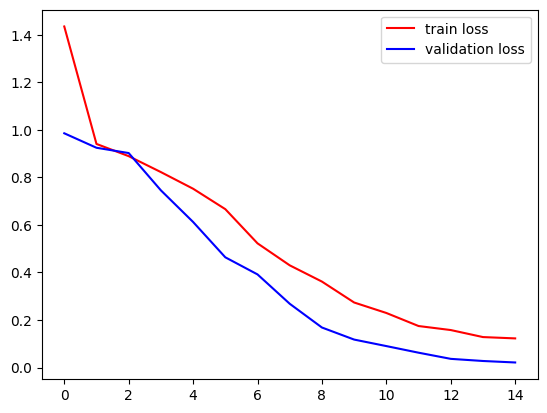

In [25]:
# plt.plot(history.history['loss'],color='red',label='train loss')
# plt.plot(history.history['val_loss'], color = 'blue', label='validation loss')
# plt.legend()
# plt.show()

In [9]:
# cnn.save('model.save')

In [26]:
# loss, accuracy = cnn.evaluate(test_set)

21/21 [==============================] - 4s 152ms/step - loss: 0.0912 - accuracy: 0.9688


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
# img = load_img('./Alzheimer_Dataset/NonDemented/30 (12).jpg', target_size=(128, 128))
# img = img_to_array(img)
# img = np.expand_dims(img, axis = 0)


# prediction = cnn.predict(img)
# y_classes = prediction.argmax(axis=-1)
# print(y_classes)
# class_names
